In [1]:
from datetime import datetime
import matplotlib.pyplot as plt

import numpy as np
import torch

import sys
sys.path.append('../../tensnet/src/')
import tensnet as tt

torch.set_default_dtype(torch.float64)

In [2]:
Li = 10
d = 2

encoding_prefix = "sta"
opt_method = "linsys"
noq = 3 * Li
bd_max = 100
T = 20

var = 1729495637

name = f'{encoding_prefix}_{opt_method}_noq_{noq}_BD_{bd_max}_iter_{T}_{var}'

In [3]:
solution = tt.load_object(f'/Users/stefanopisoni/NoSync/3D_evolution/results/{name}.mpssol')

In [4]:
slice_mps = solution[0][0] # 10th time step of u component
slice_mps

<class 'tensnet.networks.base_mps.MPS'> | Length of MPS: 30 | 

1--T--2--T--4--T--8--T--16--T--32--T--64--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--100--T--62--T--32--T--16--T--8--T--4--T--2--T--1
   |     |     |     |      |      |      |       |       |       |       |       |       |       |       |       |       |       |       |       |       |       |       |       |      |      |      |     |     |     |  
   2     2     2     2      2      2      2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2       2      2      2      2     2     2     2  

In [5]:
slice_mps.mean()

tensor(4.2736e-05)

In [6]:
slice_mps_9 = slice_mps.average(9).average(18).average(27)
slice_mps_8 = slice_mps_9.average(8).average(16).average(24)

In [10]:
slice_vec_8 = slice_mps_8.contract().reshape(2**8,2**8,2**8)

In [11]:
slice_vec_8.shape

torch.Size([256, 256, 256])

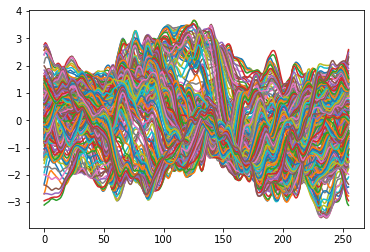

In [14]:
plt.plot(slice_vec_8[:,:,100])